<a href="https://colab.research.google.com/github/vinodvicki/NETFLIX-MOVIE-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIE_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME** **:** **NETFLIX MOVIE AND TV SHOWS CLUSTERING**

# **PROBLEM STATEMENT** 
**NETFLIX PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from flexible which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.


# ***Let's Begin !***

## **1. IMPORTING LIBRARIES**

In [3]:
# importing the required libraries
import pandas as pd 
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk

#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import scipy.cluster.hierarchy as shc

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## **2. DATASET LOADING & OVERVIEW**

In [4]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# importing dataset 
Dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /netflix movie and tv shows data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [6]:
# Dataset first
Dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
#Dataset last
Dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
# Dataset rows & columns
Dataset.shape

(7787, 12)

In [9]:
# dataset info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# Dataset Duplicates Value Count()
len(Dataset[Dataset.duplicated()])

0

In [11]:
# missing values/Null values
Dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#total null values
Dataset.isnull().sum()
     

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

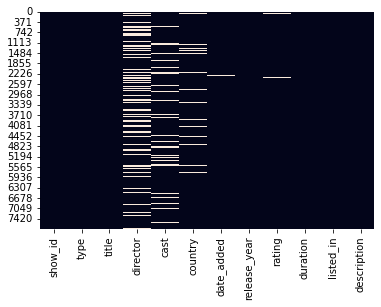

In [13]:
#visualizing the missing values by plotting Heatmap
sns.heatmap(Dataset.isnull(),cbar= False)

#### **Knowing About Our Dataset Till Now**

However, based on the previous conversation, the information provided was about a dataset consisting of TV shows and movies available on Netflix as of 2019, collected from a third-party Netflix search engine called Flixable. It was also mentioned that the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased by more than 2,000 titles.

The above dataset has 7787 rows & 12 columns.there are null values and no duplicate values in dataset

## **3. UNDERSTANDING VARIABLES**

In [14]:
#dataset columns
Dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
#dataset describe 
Dataset.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### variable description


* **Show Id   :** Unique id for every movie / tv show

* **Type      :** Identfier - A movie or tv show

* **Title     :** Tittle of the movie/show

* **Director  :** Director of the show

* **Cast      :** Actors involved

* **Country   :** Country of production 

* **Date added :** Date it was added on Netflix

* **Release year  :** Actual release year of the show

* **Rating     :** Tv rating of the show 

* **Duration    :** Total duration in minutes or number of seasons

* **Listed in    :** Genre

* **Description  :** The summary description



In [16]:
### checking Unique Values for each Vairable 
for i in Dataset.columns.tolist():
  print("no of unique values in ", i ,"is",Dataset[i].nunique(),".")

no of unique values in  show_id is 7787 .
no of unique values in  type is 2 .
no of unique values in  title is 7787 .
no of unique values in  director is 4049 .
no of unique values in  cast is 6831 .
no of unique values in  country is 681 .
no of unique values in  date_added is 1565 .
no of unique values in  release_year is 73 .
no of unique values in  rating is 14 .
no of unique values in  duration is 216 .
no of unique values in  listed_in is 492 .
no of unique values in  description is 7769 .


## **4. DATA WRANGLING**

In [17]:
# Create a copy of the current dataset and assigning to df
df  = Dataset.copy()
df.shape

(7787, 12)

* There are some missing values in cast ,director, country  are replaced with unknown 
* 10 records of missing values of date_added are dropped
* The missing values in rating can be imputed with mode 

In [18]:
# handling missing values 
# missing values in cast ,director, country are replaced with unknown
df[['cast','director','country']] = df[['cast','director','country']].fillna('Unknown')

# imputing null value in rating column with mode
df[['rating']] = df[['rating']].fillna(df['rating'].mode()[0])

#droping null value in date_added 
df.dropna(axis=0 , inplace = True )

In [19]:
df.shape

(7777, 12)

In [20]:
# listed top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [21]:
# list of genre of shows
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [22]:
# choosing the primary country and primary genre to simplify the analysis by using lambada expression

df['country'] =df['country'].apply(lambda x : x.split(',')[0])
df['listed_in'] =df['listed_in'].apply(lambda x : x.split(',')[0])


In [23]:
# country in which each movie produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [24]:
# genre in shows 
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [25]:
df['duration'].value_counts()

1 Season     1608
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
             ... 
9 min           1
182 min         1
224 min         1
233 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

### Typecasting duration column from string to integer

In [26]:
# splitting the duration column and changing the data type to integer 
df['duration'] = df['duration'].apply(lambda x : int(x.split()[0]))

In [27]:
#number of seasons for tv shows
df[df['type'] =='TV show'].duration.value_counts()

Series([], Name: duration, dtype: int64)

In [28]:
#movie length in minutes
df[df['type'] == 'Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [29]:
#datatype of duration 
df.duration.dtype

dtype('int64')

** Typecasting 'date_added' column from string to datetime **

In [30]:
# coverting date_added from sting to datetime
df['date_added'] = pd.to_datetime( df['date_added'] )

In [31]:
#first & last date on which a show was added on netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

* the shows are added on netflix 1st jan 2008 to 16th jan 2021 wich means we have data of 13 years

In [32]:
# adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

#droping date_added column from dataset
df.drop('date_added' , axis = 1, inplace = True)

### Rating

In [33]:
df['rating']
     

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7777, dtype: object

In [34]:
# age ratings
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [35]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [36]:
# age rating
df.rating.value_counts()

Adults          3624
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: rating, dtype: int64

In [37]:
# type should be a categorical
#df['type'] = pd.Categorical(df['type'])
#df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

## **5. EXPLORATORY DATA ANALYSIS**

In [38]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

Text(0.5, 1.0, 'Movies and tv shows in the dataset')

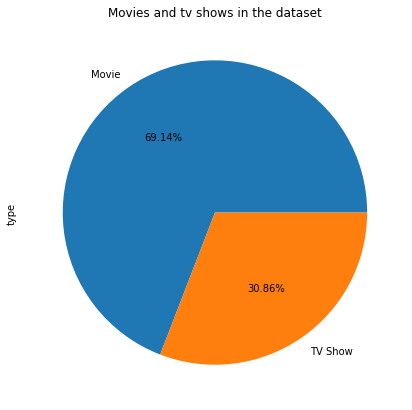

In [39]:
# ploting a pie chart 
plt.figure(figsize= (7,7))
df['type'].value_counts().plot(kind = 'pie' , autopct = '%1.2f%%')
plt.title('Movies and tv shows in the dataset')

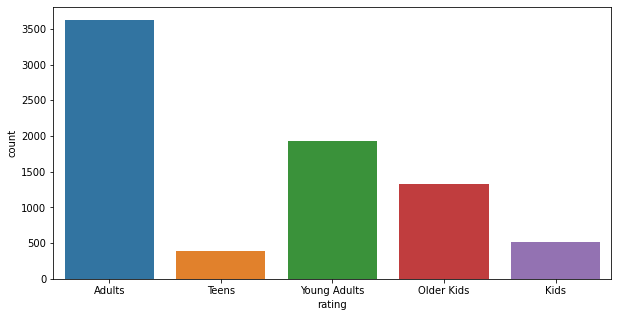

In [40]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df)
plt.show()

* There are more movies (69.14%) than TV shows (30.86%) in the dataset.

Adults has the highest number of ratings for TV Shows

**TOP 10 DIRECTORS IN THE DATASET**

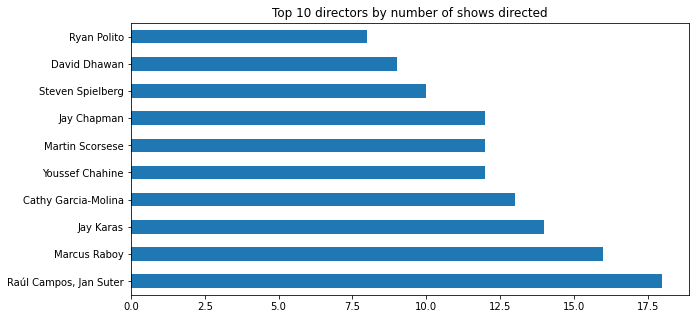

In [41]:
#Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director'] == 'Unknown')].director.value_counts().nlargest(10).plot(kind = 'barh')
plt.title('Top 10 directors by number of shows directed')
plt.show()

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

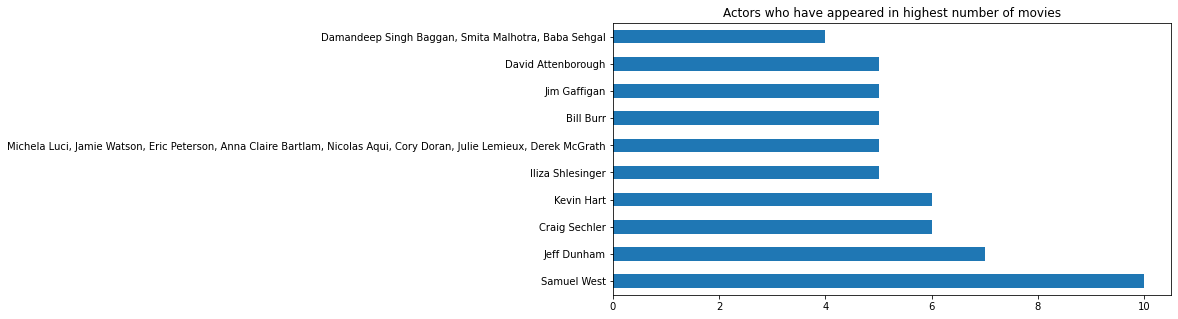

In [42]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

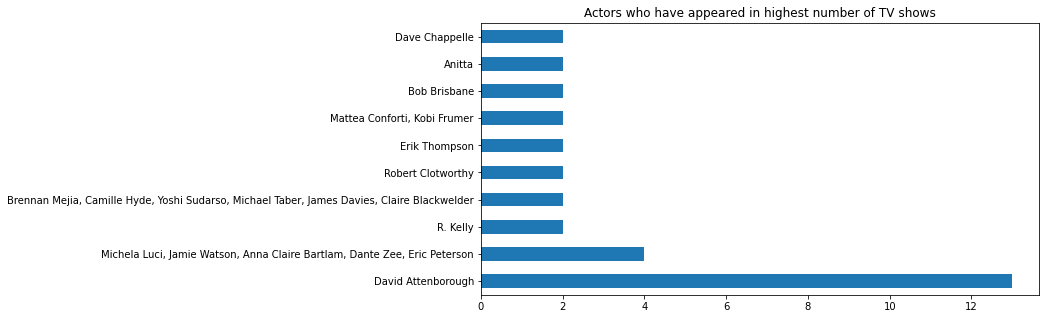

In [43]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

**TOP 10 GENRE OF THE MOVIES**

<AxesSubplot:title={'center':'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

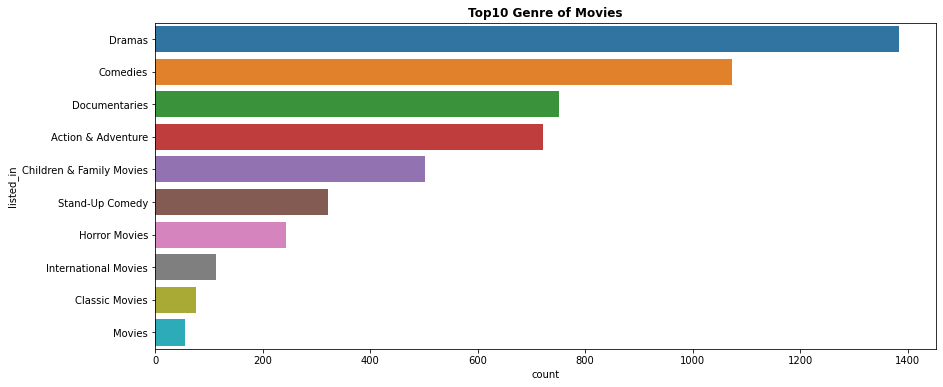

In [44]:
#Analysing top10 genre of the Movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])


**TOP 10 GENRE OF THE TV SHOWS**

<AxesSubplot:title={'center':'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

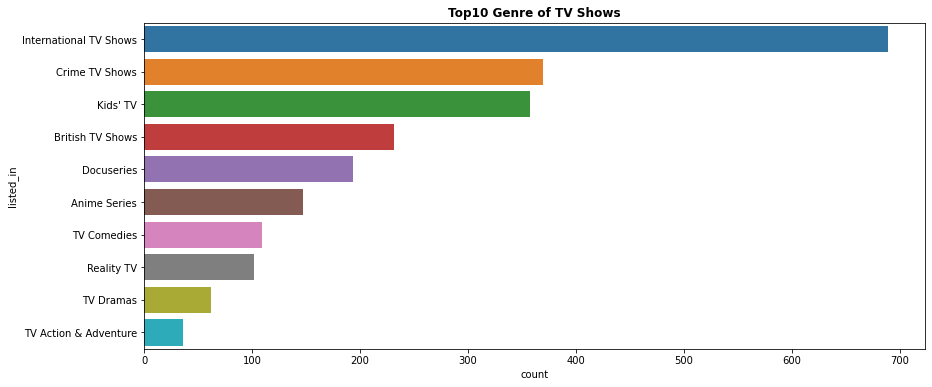

In [45]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

**TOP 10 COUNTRIES WITH MOST CONTENT**

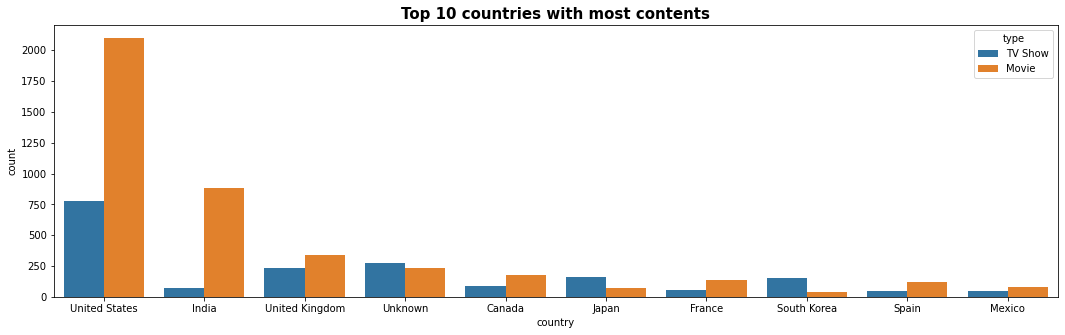

In [46]:
#Analysing top 10 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

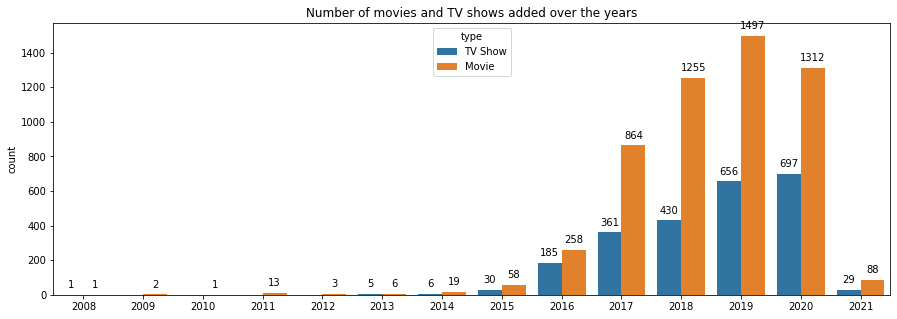

In [47]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(15,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [48]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap


country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775


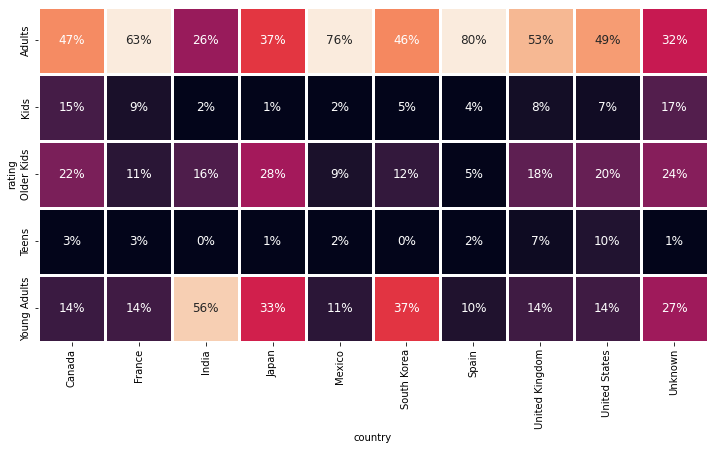

In [49]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
sns.heatmap(pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**Visualizing the movies and tv_shows based on the release year**

In [50]:
# yearly wise movies
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
movies_year

2021     12
2020    411
2019    582
2018    734
2017    744
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [51]:
#yearly wise tvshows
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    157
2014     90
2013     64
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

In [52]:
# Movie statistics
df[df['type'] == 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

 Average Movie length over the Years

Text(0.5, 0, 'year')

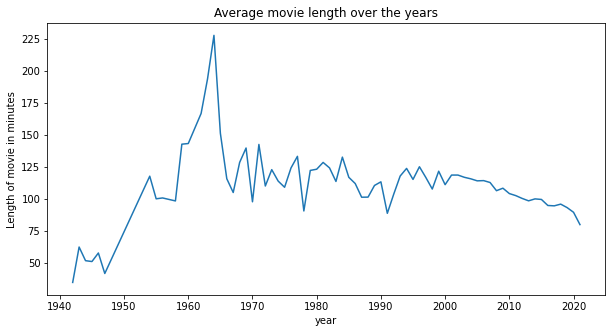

In [53]:
plt.figure(figsize =(10,5))
df[df['type'] == 'Movie'].groupby('release_year')['duration'].mean().plot(kind = 'line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('year')

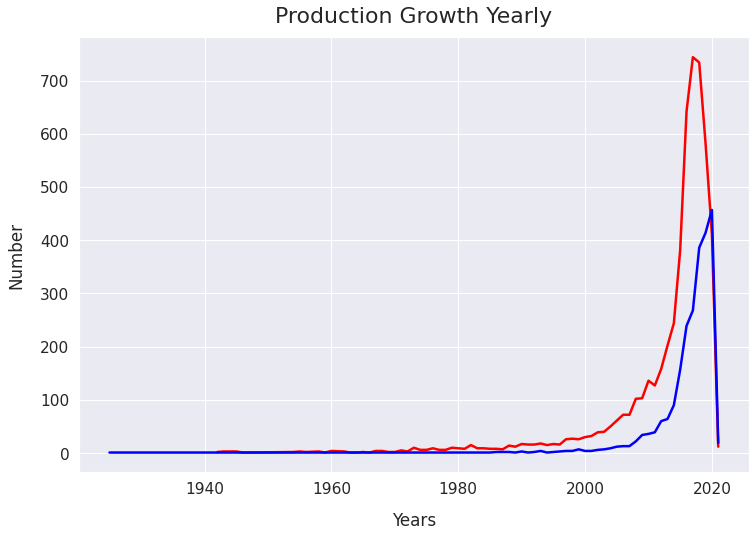

In [54]:
#production Growth yearly
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='red',label="Movies / year")
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production Growth Yearly", y=1.02, fontsize=22);
plt.show()

* Netflix has greater number of new movies / TV shows than the old ones.


<AxesSubplot:xlabel='count', ylabel='release_year'>

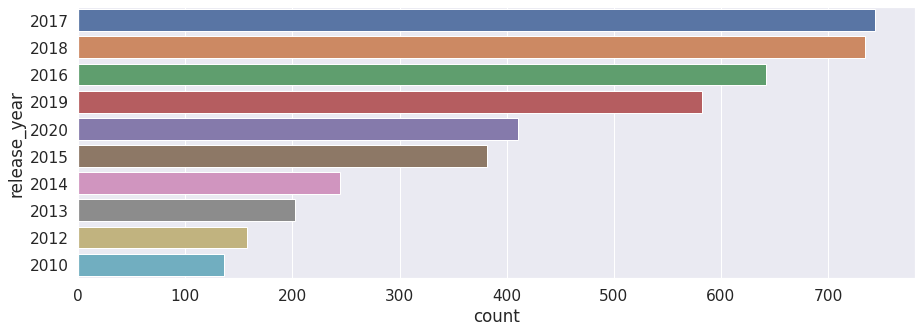

In [55]:
#Analysing how many movies released per year in last 10 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:10])    

<AxesSubplot:xlabel='count', ylabel='release_year'>

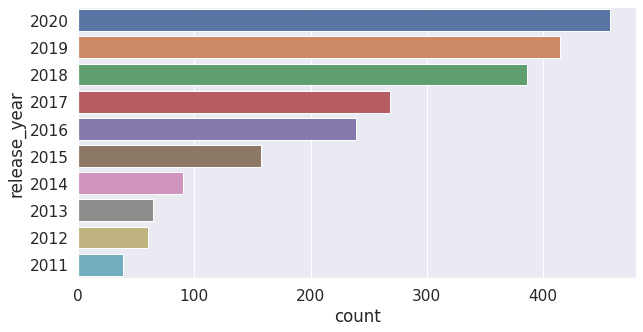

In [56]:
#Analysing how many movies released per year in last 10 years
plt.figure(figsize=(10,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:10])

Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.

([<matplotlib.patches.Wedge at 0x7f8d668405e0>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

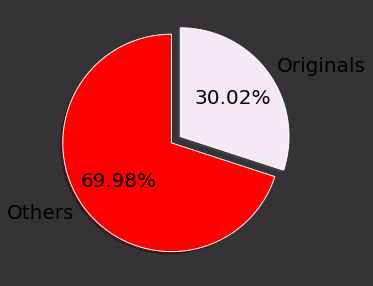

In [57]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

**Distribution of Movie Duration**

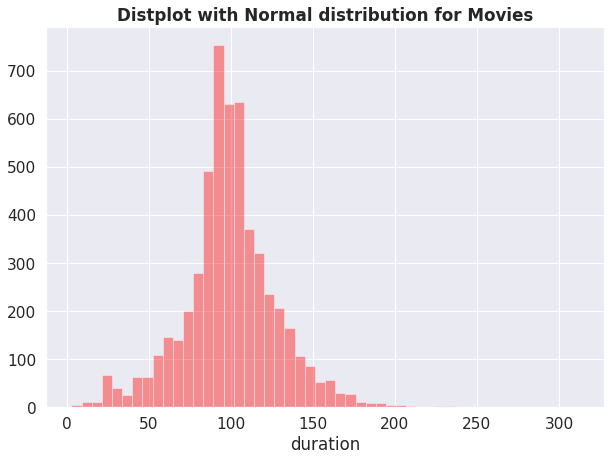

In [58]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'],kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()
     

<AxesSubplot:title={'center':'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

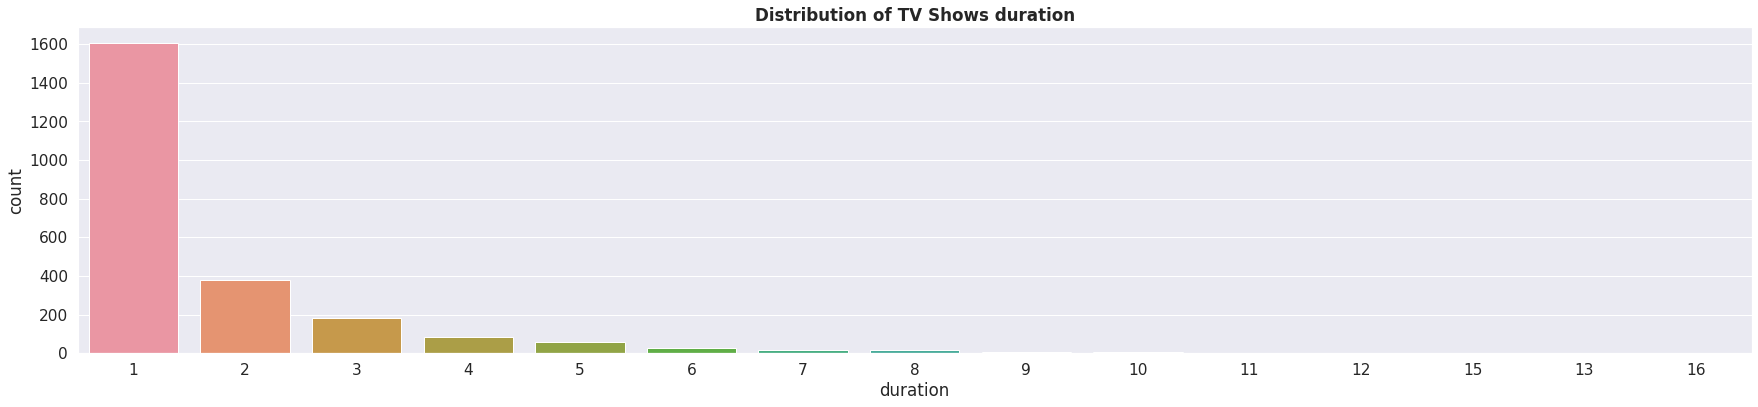

In [59]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)


In [60]:
# Set the maximum columns to display to None
pd.set_option('display.max_columns', None)

**HYPOTHESIS TESTING**

HO : Movies rated for kids and older kids are at least two hours long.

H1 : Movies rated for kids and older kids are not at least two hours long.

In [61]:
movies

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,originals
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,Yes
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,No
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,No
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,2020,No
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,Adults,95,Horror Movies,"After an awful accident, a couple admitted to ...",6,2020,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,Older Kids,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",1,2020,No
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,Adults,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,10,2020,No
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,Young Adults,111,Dramas,A scrappy but poor boy worms his way into a ty...,3,2019,No
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,Adults,44,Documentaries,"In this documentary, South African rapper Nast...",9,2020,No


In [62]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,2020,1


In [63]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]
     

#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [64]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration']
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,1,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,1,Teens


In [65]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,107.772021
3,Adults,98.230769


In [66]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [67]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [68]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [69]:
#t-distribution
stats.t.ppf(0.975,dof)
     

1.9620900365868947

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, Movies rated for kids and older kids are not at least two hours long.

H1 : The duration which is more than 90 mins are movies

HO : The duration which is more than 90 mins are NOT movies

In [70]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,2020,1


In [71]:
df_hypothesis['duration']= df_hypothesis['duration']
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,1


In [72]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.760833


In [73]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))
     

Mean  duration    99.307978
dtype: float64
Std  duration    1.560603
dtype: float64


In [74]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])
     

5377 2400
dof 7775
SP_2 = duration    252.849635
dtype: float64
SP duration    15.901246
dtype: float64
tvalue 249.8923650639716


In [75]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602691465072455

In [76]:
#t-distribution
stats.t.ppf(0.975,dof)
     

1.960269146507245

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, the duration which is more than 90 mins are movies

 Word Cloud

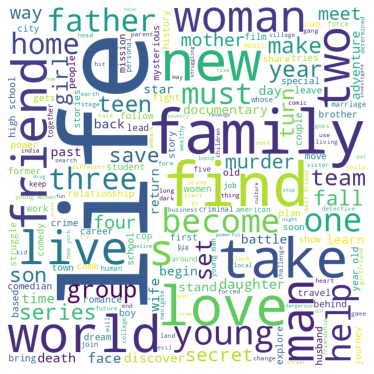

In [77]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

* Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret

## **6. DATA PREPROCESSING**

### **6.1. Modelling Approach**













1.   Select the attributes based on which you want to cluster the shows

2.  Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.

3.  Lemmatization to generate a meaningful word out of corpus of words
4.  Tokenization of corpus

5.  Word vectorization

6.  Dimensionality reduction

7.  Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques

8.  Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:

* Director
* Cast
* Country
* Listed in (genres)
* Description

In [78]:
# using the orignal dataset for clustering since 
# it does not required
df1 = Dataset.copy()

In [79]:
df1.fillna('',inplace = True)

In [80]:
# combining all the clustering attributes into a single column
df1['clustering_attributes'] = (df1['director'] + '' +
                                df1['cast'] + '' +
                                df1['country'] + '' +
                                df1['listed_in'] + '' +
                                df1['description'] )

In [81]:
df1['clustering_attributes'][1]

'Jorge Michel GrauDemián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen BeatoMexicoDramas, International MoviesAfter a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

### **6.2. Removing non -ASCII Characters**

ASCII stands for "American Standard Code for Information Interchange" 
-
Non-ASCII characters are characters that do not belong to the ASCII character set. ASCII is a 7-bit character set that includes English letters, numbers, and punctuation marks. Non-ASCII characters include letters and symbols from other languages and character sets, such as accented letters and ideograms. These characters can cause issues when working with text data, particularly when trying to process or analyze the data using certain programming languages or tools that are designed to handle only ASCII characters.

In [82]:
# creating a function to remove non- ascii characters
def remove_non_ascii(words):
  ''' function to remove non-ASCII characters '''
  new_words =[]
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words  

In [83]:
# removing non - ASCII Characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [84]:
df1['clustering_attributes'][1]

'Jorge Michel GrauDemian Bichir, Hector Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen BeatoMexicoDramas, International MoviesAfter a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

* we have successfully removed all non- ascii characters from the corpus

### **6.3. Remove stopwords and lowercase**

In [85]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text):
    """
    Removes stopwords and converts text to lowercase
    
    Parameters:
    text (str): Input text to preprocess
    
    Returns:
    str: Preprocessed text
    """
    # Define stopwords
    stop_words = set(stopwords.words('english'))
    
    # Remove punctuation and convert to lowercase
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    
    # Join the filtered words back into a string
    preprocessed_text = " ".join(filtered_text)
    
    return preprocessed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [87]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(preprocess_text)

In [88]:
df1['clustering_attributes'][40]

'muharrem gulmezerdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozermanturkeycomedies international moviesthe slacker owner public bath house rallies community save big developer comes town close open new mall'

### **6.4. Remove Punctuations !**

In [89]:
# define a function to remove punctuations
def remove_punctuation(text):
  ''' a function for removing punctuation '''

  translator = str.maketrans('','',string.punctuation)
  # remove punctuation using the translation table

  text = text.translate(translator)
  return text

In [90]:
# Removing punctuation marks
df1['clustering_attributes'] =df1['clustering_attributes'].apply(remove_punctuation)

In [91]:
df1['clustering_attributes'][40]

'muharrem gulmezerdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozermanturkeycomedies international moviesthe slacker owner public bath house rallies community save big developer comes town close open new mall'

* We have successfully dropped all the punctuation marks from the corpus.

### **6.5. Lemmatization**



Lemmatization is the process of reducing a word to its base or dictionary form, known as a lemma. It involves removing inflections and variations of a word, such as plural forms or verb conjugations, to get to its base form. This helps to group together variations of a word that have the same meaning, which can be useful for natural language processing and text analysis tasks. For example, the lemmatization of the word "running" would be "run", and the lemmatization of the word "cats" would be "cat". Lemmatization is often used in combination with other text preprocessing techniques, such as tokenization and stopword removal.





In [92]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [93]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    
    lemmatizer = WordNetLemmatizer()
    lemmas = []

    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [94]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [95]:
df1['clustering_attributes'][40]

'muharrem gulmezerdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozermanturkeycomedies international moviesthe slacker owner public bath house rallies community save big developer comes town close open new mall'

* we have lemmatized the corpus 

### **6.6. Tokenization**

Tokenization is the process of breaking a text into individual words or tokens. It is an essential step in Natural Language Processing (NLP) and helps in text cleaning, analysis, and modeling. In Python, tokenization can be done using various libraries such as NLTK, SpaCy, TextBlob, etc.


In [96]:
# importing word_tokenize from NLTK
from nltk.tokenize import word_tokenize ,TweetTokenizer

In [97]:
# Tokenize using TweetTokenizer
tokenizer = TweetTokenizer()

In [98]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [99]:
df1['clustering_attributes']

0       [joao, miguel, bianca, comparato, michel, gome...
1       [jorge, michel, graudemian, bichir, hector, bo...
2       [gilbert, chantedd, chan, stella, chung, henle...
3       [shane, ackerelijah, wood, john, c, reilly, je...
4       [robert, luketicjim, sturgess, kevin, spacey, ...
                              ...                        
7782    [josef, faresimad, creidi, antoinette, turk, e...
7783    [mozez, singhvicky, kaushal, sarahjane, dias, ...
7784    [nasty, cdocumentaries, international, movies,...
7785    [adriano, zumbo, rachel, khooaustraliainternat...
7786    [sam, dunnunited, kingdom, canada, united, sta...
Name: clustering_attributes, Length: 7787, dtype: object

* The corpus is converted to tokens.

### **6.7. Vectorization**

vectorization refers to the process of converting text or categorical data into numerical vectors that can be used as input for machine learning algorithms.Vectorization is an important step in natural language processing (NLP) and text analytics, as it allows machine learning models to work with text data.

There are several techniques for vectorization, including:
1. Bag-of-words
2. TF-IDF(Term Frequency-Inverse Document Frequency)
3. Word Embedding
4. One-Hot Encoding

We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document frequency.


---
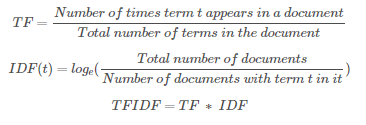




In [100]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [101]:
# Tokenization
def identity_tokenizer(text):
    return text

In [102]:
# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer( tokenizer= identity_tokenizer , stop_words= 'english' ,lowercase= False ,max_features= 20000)
X = tfidf.fit_transform(clustering_data)

In [103]:
#def tfidf_vectorizer(data):
   # tfidf = TfidfVectorizer(tokenizer=tfidf_vectorizer, stop_words='english', lowercase=False, max_features=20000)
   # X = tfidf.fit_transform(data)
    #return X

In [104]:
# Shape of X
X.shape

(7787, 20000)

In [105]:
# data type of X
type(X)

scipy.sparse.csr.csr_matrix

In [106]:
# convert X into array form for clustering
X = X.toarray()

### **6.8. Dimensionality Reduction**

Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while retaining as much relevant information as possible. This is often done to reduce the computational complexity of a machine learning model or to visualize high-dimensional data in a lower-dimensional space.

There are several methods for dimensionality reduction
1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3.  t-distributed Stochastic Neighbor Embedding (t-SNE) .etx


---
These methods aim to find a lower-dimensional representation of the data that captures as much variance or discrimination as possible


**Dimensionality Reduction using (PCA) :** is a technique used for dimensionality reduction of large datasets

In [107]:
# using PCA to reduce dimensionality 
pca =  PCA(random_state= 42)
pca.fit(X)

PCA(random_state=42)

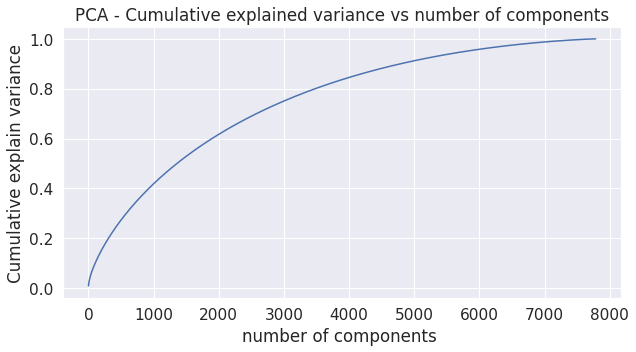

In [108]:
# Explained Variance for different of components
plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#given title 
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel( 'number of components ')
plt.ylabel('Cumulative explain variance')
plt.show()

* We find that 100% of the variance is explained by about ~7500 components.

* Also, more than 80% of the variance is explained just by 4000 components

* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [109]:
# reducing the dimensions to 4000 USing PCA
pca = PCA(n_components= 4000 , random_state= 42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [110]:
# Transformed features
x_pca = pca.transform(X)

In [111]:
x_pca[1]

array([-0.0397298 ,  0.01823119, -0.01992248, ...,  0.00712279,
       -0.00460692, -0.01246048])

In [112]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

* We have successfully reduced the dimensionality of data using PCA.

## **7. CLUSTER IMPLEMENTATION**

There are several types of clustering algorithms, including:

1. K-means clustering
2. Hierarchical clustering
3. Density-based clustering
4. Model-based clustering
5. Fuzzy clustering
6. Subspace clustering
7. Spectral clustering
8. Affinity propagation
9. Agglomerative clustering
10. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Each algorithm has its own strengths and weaknesses, and the choice of algorithm depends on the nature of the data and the specific problem being addressed.

### **7.1. K- means clustering** 

This algorithm used for clustering similar data points in a dataset. The algorithm divides a set of observations into a specified number of clusters (k) based on the similarity between the data points.

Text(0, 0.5, 'WCSS')

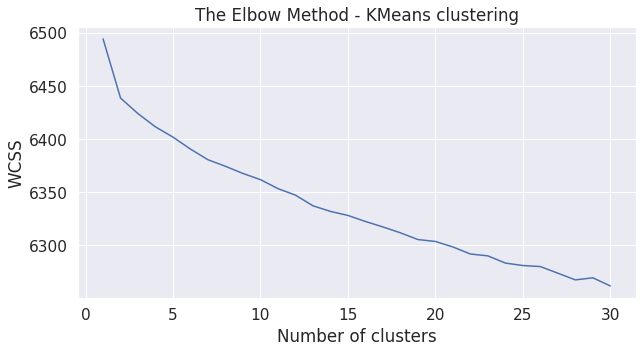

In [115]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')